<a href="https://colab.research.google.com/github/saif2544/ML-project-1/blob/main/lab_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment name:** Exploring different types of Regression.

**ID No.: 1608002**

**Objective:**
1.   To apply various regression algorithms on the real world dataset.



**Procedure:**

First of all, PANDAS and Numpy library had been called.Then the dataset was download.By calling pd. the data had been read from the data set.Using mean values missing values were removed from the dataset.Then feature and target dataset was selected and separated.Then fit transform was implemeted on dataset for builbing train set.After that, different regression algorithms(Linear,SVR,Random Forrest Regression etc.) were used.Mean absolute error, mean squared error and r2 score are used as a performance metrices for regression problem .Then final values were compared. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Download the data
!wget -O insurance.csv https://www.dropbox.com/s/mwgqgjbmfw0xa5p/insurance.csv?dl=0

--2021-12-20 15:02:01--  https://www.dropbox.com/s/mwgqgjbmfw0xa5p/insurance.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/mwgqgjbmfw0xa5p/insurance.csv [following]
--2021-12-20 15:02:01--  https://www.dropbox.com/s/raw/mwgqgjbmfw0xa5p/insurance.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc044e305bf4ce950a65923afd4d.dl.dropboxusercontent.com/cd/0/inline/BcM5Z-gsF4qpCWhUZiiu86mWP3VIDMcjT0ELIA3A4k3ZY9jlPH06cp9sVCVsDAmv2eTqiXugROCAHaE6_lGd_JoFGLEy4_B9aXe59hIsNb-7hJfcAIfODZT4mbtCyG8s1yksQjsflNXsuKZT8TBBCGC1/file# [following]
--2021-12-20 15:02:01--  https://uc044e305bf4ce950a65923afd4d.dl.dropboxusercontent.com/cd/0/inline/BcM5Z-gsF4qpCWhUZiiu86mWP3VIDMcjT0ELIA3A4k3ZY9jlPH06cp9sVCVsDAmv2eTqiXugROCAHaE6_l

In [4]:
dataset = pd.read_csv('insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Read the data and it has 1338 rows and 7 columns

In [5]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Extract the column names and they are: age, sex, bmi, children, smoker, region, charges.

In [6]:
print(dataset[pd.isnull(dataset.age)])
print(dataset[pd.isnull(dataset.sex)])
print(dataset[pd.isnull(dataset.bmi)])
print(dataset[pd.isnull(dataset.children)])
print(dataset[pd.isnull(dataset.smoker)])
print(dataset[pd.isnull(dataset.region)])
print(dataset[pd.isnull(dataset.charges)])

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


Here, null value is checked for all columns.

In [7]:
features_value = dataset[['age','sex','bmi','children','smoker','region']]
target_value = dataset[['charges']]

Dataset is divided into features value and target value.

In [9]:
features_value.head(8)

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
5,31,female,25.740,0,no,southeast
6,46,female,33.440,1,no,southeast
7,37,female,27.740,3,no,northwest


In [11]:
target_value.head(8)

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
6,8240.58960
7,7281.50560


In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame(encoder.fit_transform(features_value[['sex','smoker','region']]))

encoded_labels.columns = encoder.get_feature_names_out(['sex','smoker','region'])
new_dataset = pd.concat([features_value, encoded_labels], axis=1)

new_dataset.head(8)


,age,sex,bmi,children,smoker,region,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5,31,female,25.740,0,no,southeast,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,46,female,33.440,1,no,southeast,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,37,female,27.740,3,no,northwest,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Machine learning only works with numerical data. In our dataset, there is categorical data available. So, it need to be converted into numerical form. So there is two ways to do this. One is label encoding and another is one hot encoding. In our model, one hot encoding technique is applied.

In [15]:
new_features_value = new_dataset[['age','bmi','children','sex_female','sex_male','smoker_no',
                                  'smoker_yes','region_northeast','region_northwest','region_southeast','region_southwest']]
new_features_value.head(8)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5,31,25.740,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,46,33.440,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,37,27.740,3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


This is the new encoded features value.

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(new_features_value, target_value,test_size=0.2, random_state=0)

Here, data is splitted into train and test set. Train set is used to train our model and test set evaluate the performance.

In [17]:
x_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
578,52,30.200,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
610,47,29.370,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
569,48,40.565,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1034,61,38.380,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
198,51,18.050,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1084,62,30.495,2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
726,41,28.405,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1132,57,40.280,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
725,30,39.050,3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


**Linear Regression**

In [18]:
from sklearn.linear_model import LinearRegression

l_regressor = LinearRegression()
l_regressor.fit(x_train, y_train)

y_pred = l_regressor.predict(x_test)

Now, linear regression algortihm is applied to predict from the test dataset.

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('mae:',mean_absolute_error(y_test, y_pred))
print('mse:',mean_squared_error(y_test, y_pred))
print('r2 score:',r2_score(y_test, y_pred))

mae: 3933.272649405239
mse: 31827950.229523838
r2 score: 0.7999876970680433


Mean absolute error, mean squared error and r2 score are used as a performance metrics for regression problem.

**Support Vector Regression**

In [20]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='linear')
svr_regressor.fit(x_train, y_train)

y_pred = svr_regressor.predict(x_test)

print('mae:',mean_absolute_error(y_test, y_pred))
print('mse:',mean_squared_error(y_test, y_pred))
print('r2 score:',r2_score(y_test, y_pred))

mae: 6622.0757004869965
mse: 171082008.82377517
r2 score: -0.07510871194360691


Now, support vector regressor algortihm is applied to predict from the test dataset.

**Decision Tree**

In [21]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train, y_train)

y_pred = dt_regressor.predict(x_test)

print('mae:',mean_absolute_error(y_test, y_pred))
print('mse:',mean_squared_error(y_test, y_pred))
print('r2 score:',r2_score(y_test, y_pred))

mae: 3022.047168391791
mse: 43585220.10885323
r2 score: 0.7261029948550859


Here, decision tree algortihm is applied to predict from the test dataset.

**Random Forest Regression**

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators = 10,random_state = 0)
rf_regressor.fit(x_train,y_train)

y_pred = rf_regressor.predict(x_test)

print('mae:',mean_absolute_error(y_test, y_pred))
print('mse:',mean_squared_error(y_test, y_pred))
print('r2 score:',r2_score(y_test, y_pred))

mae: 2774.0732032742535
mse: 21146373.711824056
r2 score: 0.8671125575394933


Here, random forest regressor algortihm is applied to predict from the test dataset.

In [23]:
data_corr = pd.concat([new_features_value, target_value],axis=1)
data_corr.corr()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
age,1.000000,0.109272,0.042469,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016,0.299008
bmi,0.109272,1.000000,0.012759,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205,0.198341
children,0.042469,0.012759,1.000000,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914,0.067998
sex_female,0.020856,-0.046371,-0.017163,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184,-0.057292
sex_male,-0.020856,0.046371,0.017163,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184,0.057292
smoker_no,0.025019,-0.003750,-0.007673,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945,-0.787251
smoker_yes,-0.025019,0.003750,0.007673,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945,0.787251
region_northeast,0.002475,-0.138156,-0.022808,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.006349
region_northwest,-0.000407,-0.135996,0.024806,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,-0.039905
region_southeast,-0.011642,0.270025,-0.023066,-0.017117,0.017117,-0.068498,0.068498,-0.345561,-0.346265,1.000000,-0.346265,0.073982


Correlation between features and target value are shown in this section.

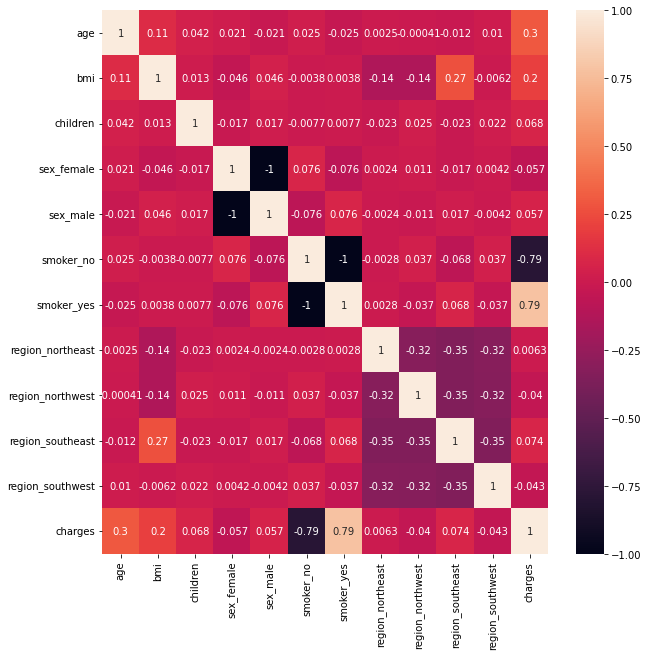

In [24]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data_corr.corr(), annot=True)
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
y_sc = StandardScaler()
x_train_new = x_sc.fit_transform(x_train[['age','bmi','children','sex_female','sex_male','smoker_no','smoker_yes',
                                          'region_northeast','region_northwest','region_southeast','region_southwest']])
x_test_new = x_sc.transform(x_test[['age','bmi','children','sex_female','sex_male','smoker_no','smoker_yes',
                                    'region_northeast','region_northwest','region_southeast','region_southwest']])
y_train_new = y_sc.fit_transform(y_train[['charges']])
y_test_new = y_sc.transform(y_test[['charges']])

Data is standarized for large scale values.

In [26]:
from sklearn.linear_model import LinearRegression

l_regressor = LinearRegression()
l_regressor.fit(x_train_new, y_train_new)
y_pred = l_regressor.predict(x_test_new)

print('mae:',mean_absolute_error(y_test_new, y_pred))
print('mse:',mean_squared_error(y_test_new, y_pred))
print('r2 score:',r2_score(y_test_new, y_pred))

mae: 0.3370712236753973
mse: 0.22375017582854498
r2 score: 0.7984150759863187


In [27]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='linear')
svr_regressor.fit(x_train_new, y_train_new)
y_pred = svr_regressor.predict(x_test_new)

print('mae:',mean_absolute_error(y_test_new, y_pred))
print('mse:',mean_squared_error(y_test_new, y_pred))
print('r2 score:',r2_score(y_test_new, y_pred))

mae: 0.2621801324724253
mse: 0.2574520342050306
r2 score: 0.7680518079585446


In [28]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train_new, y_train_new)
y_pred = dt_regressor.predict(x_test_new)

print('mae:',mean_absolute_error(y_test_new, y_pred))
print('mse:',mean_squared_error(y_test_new, y_pred))
print('r2 score:',r2_score(y_test_new, y_pred))

mae: 0.2762585003297259
mse: 0.3360340517868108
r2 score: 0.6972543215011326


In [29]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators = 10,random_state = 0)
rf_regressor.fit(x_train_new,y_train_new)

y_pred = rf_regressor.predict(x_test_new)

print('mae:',mean_absolute_error(y_test_new, y_pred))
print('mse:',mean_squared_error(y_test_new, y_pred))
print('r2 score:',r2_score(y_test_new, y_pred))

mae: 0.23639484811993614
mse: 0.14989640966083323
r2 score: 0.86495270343583


**Final Results:**  

**1.Linear Regression**

mae: 0.3370712236753973

mse: 0.22375017582854498

r2 score: 0.7984150759863187 

**2.SVR**

mae: 0.2621801324724253

mse: 0.2574520342050306

r2 score: 0.7680518079585446

**3.Decision Tree Regressor**

mae: 0.2762585003297259

mse: 0.3360340517868108

r2 score: 0.6972543215011326

**4.Random Forrest Regressor**

mae: 0.23639484811993614

mse: 0.14989640966083323

r2 score: 0.86495270343583



**Conclusion:**

in this experiment,4 types of regression algorithms were applied.for solving the problem different parameters were used.mean square error ,mean absolute error, r square score were used.one hot encoding technique was used to fit transform the problem.From the performance parameters it can be seen that differenet algorithms had been efficient for different purposes.